In [40]:
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN, SpectralClustering
import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import platform
import umap.umap_ as umap

/home/jojo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
home_dir = "."
# if platform.system() == "Darwin":
#     home_dir = "/Volumes/data"
#     device = "cpu"
# elif platform.system() == "Windows":
#     home_dir = "B:/"
#     device = "cuda"
# else:
#     home_dir = "/mnt/b"
#     device = "cuda"

embeddings_dir = f"{home_dir}"


# unnecessary_mutations = ["pomA", "rbmA", "bipA", "mbaA", "rocS", "cdgI", "nspS"]
folders = [folder if folder.find(".zip") == -1 and folder.find(".DS_Store") and os.path.isdir(folder) else None for folder in os.listdir(embeddings_dir)]


folders = filter(None, folders)
folders = sorted(folders, key = str.casefold)
print([folder for folder in folders])


npy_files = {}
for folder in folders:
    print(f"Loading numpy files for {folder}")
    for file in os.listdir(f"{embeddings_dir}/{folder}/10x"):
        key = f"{folder}-{file}"
        if folder not in npy_files.keys():  
            npy_files[key] = np.load(f"{embeddings_dir}/{folder}/10x/{file}")[:30]

['bipA', 'flaA', 'hapR', 'lapG', 'luxO_D47E', 'manA', 'potD1', 'rbmA', 'rbmB', 'vpsL', 'vpvC_W240R', 'WT']
Loading numpy files for bipA
Loading numpy files for flaA
Loading numpy files for hapR
Loading numpy files for lapG
Loading numpy files for luxO_D47E
Loading numpy files for manA
Loading numpy files for potD1
Loading numpy files for rbmA
Loading numpy files for rbmB
Loading numpy files for vpsL
Loading numpy files for vpvC_W240R
Loading numpy files for WT


In [28]:
midpoint_embeddings = []
labels = []
for key,val in npy_files.items():
    print(val.shape)
    midpoint_embeddings.append(val[13])
    labels.append(key[:key.find("-")])
midpoint_embeddings = np.array(midpoint_embeddings)
print(len(labels))
print(list(np.unique(labels)))
print(folders)

(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(30, 512)
(30, 512)
(30, 512)
(30, 512)
(30, 512)
(30, 512)
(30, 512)
(30, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)
(31, 512)


In [12]:
import torch

In [31]:
embeddings = []
targets = []
for target, embedding in npy_files.items():
    embeddings.append(embedding)
    targets.append(target[:target.find("-")])
embeddings = np.array(embeddings)
print(targets)
targets = np.unique(targets, return_inverse=True)[1]
print(embeddings.shape)

['bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA', 'bipA',

In [32]:
max_len = 512
model_dims = embeddings.shape[2]
print(max_len)
div_term = torch.exp(torch.arange(0,model_dims,2).float() * (-torch.log(torch.tensor(10000))/model_dims))
print(div_term)

position = torch.arange(0,max_len,dtype=torch.float).unsqueeze(1)
print(position)


encoding = torch.zeros(max_len, model_dims)
encoding[:,0::2] = torch.sin(position * div_term)
encoding[:,1::2] = torch.cos(position * div_term)


print(np.add(embeddings[0], encoding[:embeddings[0].shape[0], :embeddings[0].shape[1]]))
temporal_embeddings = []

index = 0

for video_embeddings in embeddings:
    print(index)
    index += 1
    positional_embeddings = []
    image_embeddings = np.add(video_embeddings, encoding[:video_embeddings.shape[0], :video_embeddings.shape[1]])
    image_embeddings = np.array(image_embeddings)
    temporal_embeddings.append(image_embeddings)
temporal_embeddings = np.array(temporal_embeddings)
print(temporal_embeddings.shape)


512
tensor([1.0000e+00, 9.6466e-01, 9.3057e-01, 8.9769e-01, 8.6596e-01, 8.3536e-01,
        8.0584e-01, 7.7737e-01, 7.4989e-01, 7.2339e-01, 6.9783e-01, 6.7317e-01,
        6.4938e-01, 6.2643e-01, 6.0430e-01, 5.8294e-01, 5.6234e-01, 5.4247e-01,
        5.2330e-01, 5.0481e-01, 4.8697e-01, 4.6976e-01, 4.5316e-01, 4.3714e-01,
        4.2170e-01, 4.0679e-01, 3.9242e-01, 3.7855e-01, 3.6517e-01, 3.5227e-01,
        3.3982e-01, 3.2781e-01, 3.1623e-01, 3.0505e-01, 2.9427e-01, 2.8387e-01,
        2.7384e-01, 2.6416e-01, 2.5483e-01, 2.4582e-01, 2.3714e-01, 2.2876e-01,
        2.2067e-01, 2.1288e-01, 2.0535e-01, 1.9810e-01, 1.9110e-01, 1.8434e-01,
        1.7783e-01, 1.7154e-01, 1.6548e-01, 1.5963e-01, 1.5399e-01, 1.4855e-01,
        1.4330e-01, 1.3824e-01, 1.3335e-01, 1.2864e-01, 1.2409e-01, 1.1971e-01,
        1.1548e-01, 1.1140e-01, 1.0746e-01, 1.0366e-01, 1.0000e-01, 9.6466e-02,
        9.3057e-02, 8.9769e-02, 8.6596e-02, 8.3536e-02, 8.0584e-02, 7.7736e-02,
        7.4989e-02, 7.2339e-02, 6.97

In [33]:
adjusted_temporal_embeddings = []
for embedding in temporal_embeddings:
    embedding = np.mean(embedding, axis = 0)
    adjusted_temporal_embeddings.append(embedding)
adjusted_temporal_embeddings = np.array(adjusted_temporal_embeddings)

In [34]:

mutant_labels = [label[:label.find("-")] for label in npy_files.keys()]
mutant_labels_numeric = np.unique(mutant_labels, return_inverse=True)[1]
mutant_labels_numeric = mutant_labels_numeric[0:len(mutant_labels_numeric)]


(1728, 512)


/home/jojo/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


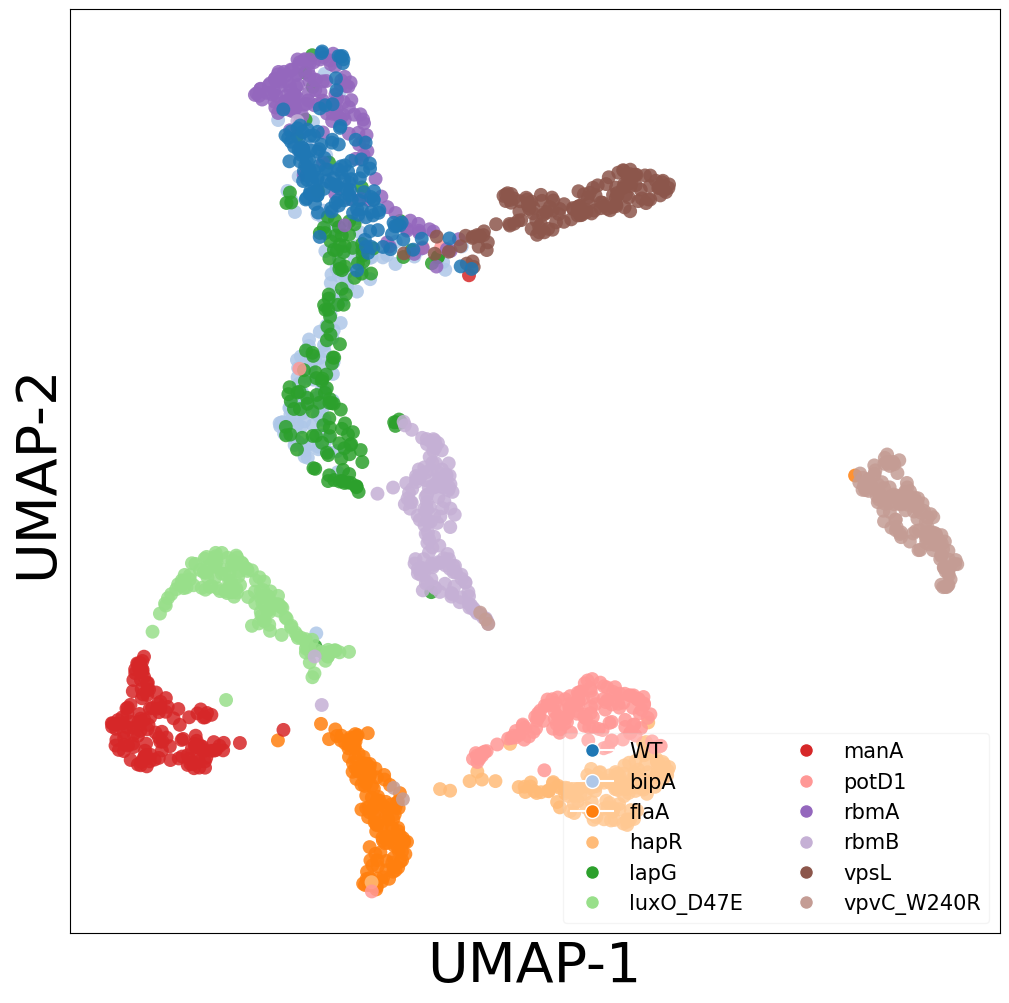

In [68]:
# Initialize UMAP
print(adjusted_temporal_embeddings.shape)
projection = umap.UMAP(n_neighbors=10, n_components=2,min_dist = 0.4, random_state=1000).fit_transform(adjusted_temporal_embeddings)
# projection = umap.UMAP(n_neighbors=20, n_components=2, random_state=1000).fit_transform(adjusted_temporal_embeddings)

color_palette = sns.color_palette('tab20', len(np.unique(labels)))
cluster_colors = [color_palette[x] for x in mutant_labels_numeric]
plt.figure(figsize=(12,12))
plt.scatter(*projection.T, s=100, linewidth=0, c=cluster_colors, alpha=0.85)
plt.xlabel("UMAP-1", fontsize=40)
plt.ylabel("UMAP-2", fontsize=40)
plt.xticks([])
plt.yticks([])
plt.tick_params(bottom=False)
unique_labels = np.unique(mutant_labels)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=10, label=f'{label}') for i,label in enumerate(unique_labels)]
plt.legend(handles=legend_elements, loc='lower right',fontsize=15, ncol = 2, framealpha=0.2)
# plt.savefig("true.png")
# plt.savefig("test.svg")
plt.show()

In [10]:
# # remove - cdgI, bipA, nspS, pomA, rbmA

# # Initialize UMAP
# numeric_labels = np.unique(cluster_labels, return_inverse=True)[1]
# np.save("embedding_labels.npy", numeric_labels)
# color_palette = sns.color_palette('tab20', 17)
# cluster_colors = [color_palette[x] for x in numeric_labels]
# plt.figure(figsize=(14,14))
# plt.scatter(*projection.T, s=100, linewidth=0, c=cluster_colors, alpha=0.85)
# plt.title("UMAP plot of Predicted Labels")
# unique_labels = np.unique(numeric_labels)
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=10, label=f'{label}') for i,label in enumerate(unique_labels)]
# plt.xlabel("UMAP-1")
# plt.ylabel("UMAP-2")
# plt.legend(handles=legend_elements, loc='upper left')
# plt.savefig("predicted.png")
# plt.show()


In [61]:
def image_cluster_labels(image_files, labels): # function that returns 
    image_cluster_labels = {}
    for file, label in zip(image_files, labels):
        if label not in image_cluster_labels.keys():
            image_cluster_labels[label] = []
        image_cluster_labels[label].append(file)
    return image_cluster_labels


# GETTING LABEL COUNTS

model = SpectralClustering(n_clusters=len(np.unique(labels)), n_init=20)
cluster_labels = model.fit_predict(projection)

image_mutant_labels = image_cluster_labels(cluster_labels, labels)
label_counts = {}
for cluster, mutant_list in image_mutant_labels.items():
    counts = {}
    for mutant in np.unique(cluster_labels):
        counts[mutant] = mutant_list.count(mutant)
    label_counts[cluster] = counts
label_counts = dict(collections.OrderedDict(sorted(label_counts.items())))
label_counts_df = pd.DataFrame(label_counts)
label_counts_df = label_counts_df.T
print(label_counts_df)
label_counts_df.to_csv("label_counts.csv", index=True)

[[-1.7554568  9.265385 ]
 [-2.9704    13.680798 ]
 [-1.2567785 12.421011 ]
 ...
 [-2.7435431 13.720746 ]
 [-2.4409811 13.2647915]
 [-2.9322453 14.134618 ]]
            0   1    2    3    4    5    6   7    8    9    10  11
WT          79   0    0   65    0    0    0   0    0    0    0   0
bipA        51  82    0   10    0    0    0   0    1    0    0   0
flaA         0   0  143    0    0    0    0   0    0    1    0   0
hapR         0   0    2    0    0    7    0   0    0    0  135   0
lapG        53  78    0    6    0    0    0   1    1    0    0   5
luxO_D47E    0   0    0    0    2    0    0   0  142    0    0   0
manA         1   0    1    0  142    0    0   0    0    0    0   0
potD1        2   1    1    0    0  128    0   0    0    0   12   0
rbmA        25   0    0  119    0    0    0   0    0    0    0   0
rbmB         0   0    1    1    0    0    0  61    1    0    0  80
vpsL        19   0    0    0    0    0  125   0    0    0    0   0
vpvC_W240R   0   0    2    0    0    0  

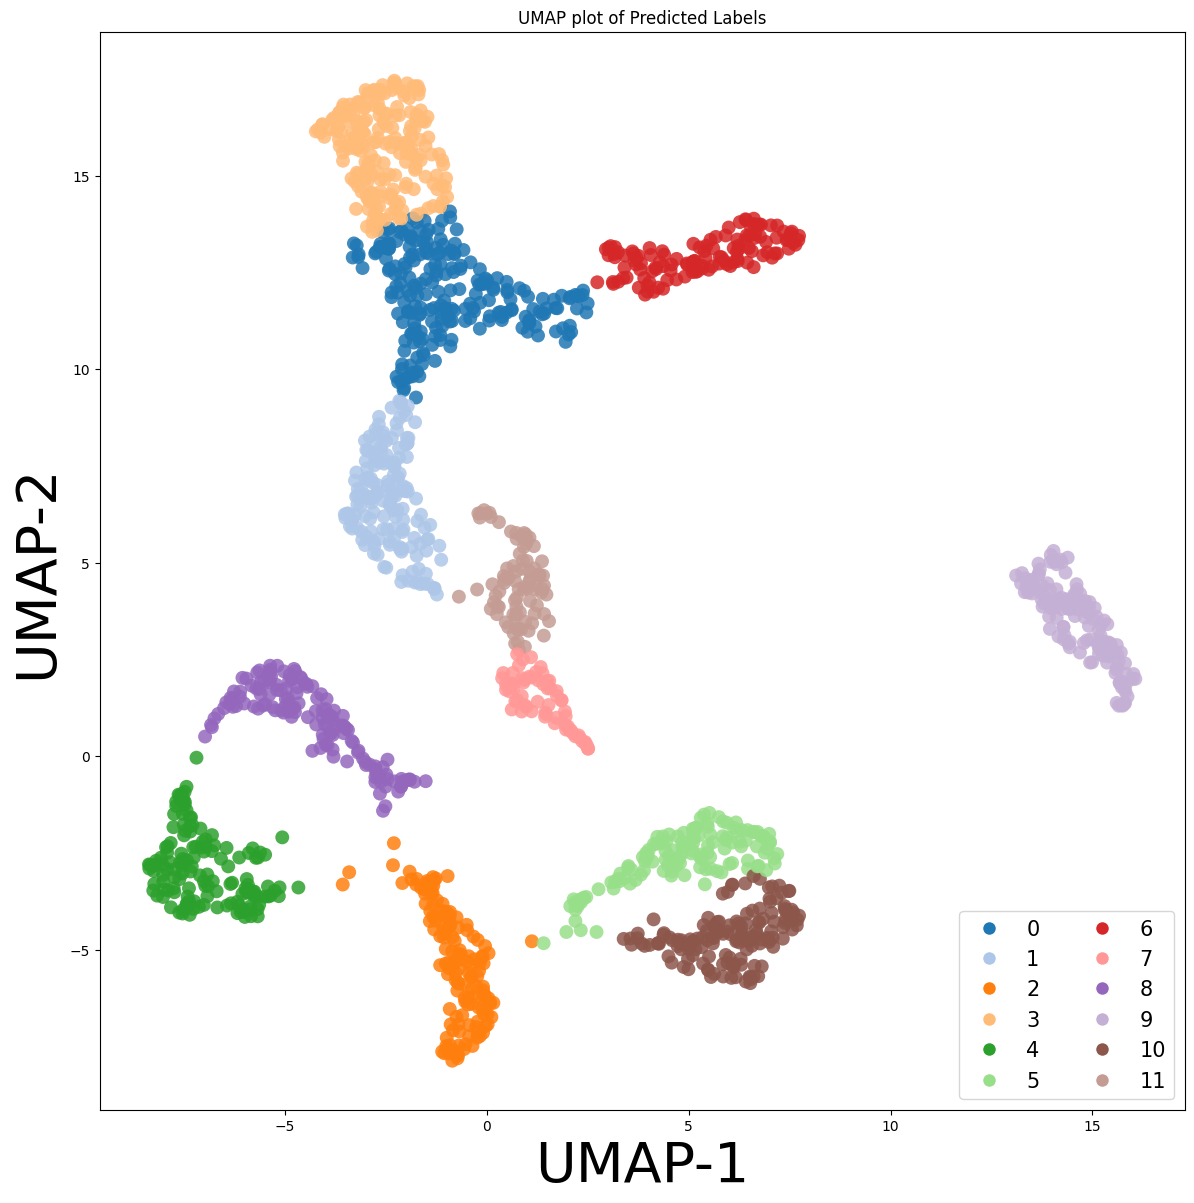

In [62]:

numeric_labels = np.unique(cluster_labels, return_inverse=True)[1]
np.save("embedding_labels.npy", numeric_labels)
color_palette = sns.color_palette('tab20', len(np.unique(labels)))
cluster_colors = [color_palette[x] for x in numeric_labels]
plt.figure(figsize=(14,14))
plt.scatter(*projection.T, s=100, linewidth=0, c=cluster_colors, alpha=0.85)
plt.title("UMAP plot of Predicted Labels")
unique_labels = np.unique(numeric_labels)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=10, label=f'{label}') for i,label in enumerate(unique_labels)]
plt.xlabel("UMAP-1", fontsize=40)
plt.ylabel("UMAP-2", fontsize=40)
plt.legend(handles=legend_elements, loc='lower right',fontsize=15, ncol = 2)
plt.savefig("predicted.png")
plt.show()

In [ ]:
test_embeddings = []
test_embeddings_dir = f"{home_dir}/XU_COLLAB/TestEmbeddings"
for file in os.listdir(test_embeddings_dir):
    print(f"Loading {file}", end = "\r")
    embedding = np.load(f"{test_embeddings_dir}/{file}")
    test_embeddings.append(embedding)
test_embeddings = np.array(test_embeddings)

In [ ]:
max_len = 512
model_dims = test_embeddings.shape[2]
div_term = torch.exp(torch.arange(0,model_dims,2).float() * (-torch.log(torch.tensor(10000))/model_dims))

position = torch.arange(0,max_len,dtype=torch.float).unsqueeze(1)


encoding = torch.zeros(max_len, model_dims)
encoding[:,0::2] = torch.sin(position * div_term)
encoding[:,1::2] = torch.cos(position * div_term)

test_temporal_embeddings = []

index = 0

for video_embeddings in test_embeddings:
    index += 1
    positional_embeddings = []
    image_embeddings = np.add(video_embeddings, encoding[:video_embeddings.shape[0], :video_embeddings.shape[1]])
    image_embeddings = np.array(image_embeddings)
    test_temporal_embeddings.append(image_embeddings)
test_temporal_embeddings = np.array(test_temporal_embeddings)
print(test_temporal_embeddings.shape)
test_adjusted_temporal_embeddings = []
for embedding in test_temporal_embeddings:
    embedding = np.mean(embedding, axis = 0)
    test_adjusted_temporal_embeddings.append(embedding)
test_adjusted_temporal_embeddings = np.array(test_adjusted_temporal_embeddings)

(1284, 31, 512)


In [63]:
test_projection = umap.UMAP(n_neighbors=8, n_components=3,min_dist = 0.4, random_state=1000).fit_transform(adjusted_temporal_embeddings)
UMAP_embeddings = pd.DataFrame(test_projection)
print(UMAP_embeddings)
mutant_labels = np.reshape(mutant_labels, (len(mutant_labels)))
UMAP_embeddings = pd.concat([pd.Series(mutant_labels), UMAP_embeddings], axis=1)
UMAP_embeddings.to_csv("UMAP_data.csv")

# plt.scatter(*test_projection.T, s=20, linewidth=0, c="black", alpha=0.85)
# plt.figure(figsize=(10,10))
# plt.scatter(*projection.T, s=100, linewidth=0, c=cluster_colors, alpha=0.5)



/home/jojo/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


             0          1         2
0    -2.858407   8.542498  9.094466
1    -1.891305  12.465300  7.451101
2    -1.893887  10.368443  6.983804
3    -1.621384   8.237573  5.309787
4    -3.009031   8.896317  8.262998
...        ...        ...       ...
1723 -1.799059  12.827929  6.349499
1724 -1.447888  10.775723  6.745950
1725 -2.188857  12.315258  6.241689
1726 -2.018880  11.917802  6.650152
1727 -2.058638  12.664528  5.954319

[1728 rows x 3 columns]


In [ ]:
plt.figure(figsize=(10,10))
# plt.scatter(*projection.T, s=100, linewidth=0, c=cluster_colors, alpha=0.5)
plt.scatter(*test_projection.T, s=100, linewidth=0, c="black", alpha=0.2)

TypeError: scatter() got multiple values for argument 's'

<Figure size 1000x1000 with 0 Axes>